In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
import json
import glob
import random
import collections
from glob import glob
import numpy as np
import pandas as pd
#import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import seaborn as sns
import shutil
import keras
from PIL import Image
#import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import keras
import json
import tensorflow as tf 
from keras.layers import Input
from keras import Sequential
from keras.layers import Dense, LSTM,Flatten, TimeDistributed, Conv2D, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import re
import string

tfds.disable_progress_bar()
from keras.models import load_model
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D,Reshape, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten, UpSampling2D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    tn = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1-y_true) * (y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip((y_true) * (1-y_pred), 0, 1)))
    

    f1_val = tp / ( tp + ( (1/2) * (fp+fn) ) + K.epsilon())
    return f1_val

In [3]:
from keras.datasets import cifar10
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
train_labels = to_categorical(train_labels)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images / 255
test_images = test_images / 255 

11490434/11490434 [==============================] - 2s 0us/step


In [11]:
np.shape(x_train)

(18000, 32, 32, 3)

In [4]:
x_train, x_unlab, y_train, y_unlab = train_test_split( train_images, train_labels , test_size=0.6, random_state=42 )

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split( x_train,y_train , test_size=0.5, random_state=40 )

In [10]:
len(X_train)

10000

In [6]:
arr = np.concatenate((X_train, x_unlab))
X_all = arr
arr = np.concatenate((Y_train, y_unlab))
Y_all = arr

In [10]:
np.shape(X_all)

(48000, 28, 28)

In [7]:
# Helper function for merging new history objects with older ones
def append_history(losses, val_losses, accuracy, val_accuracy, history):
    losses = losses + history.history["loss"]
    val_losses = val_losses + history.history["val_loss"]
    accuracy = accuracy + history.history["accuracy"]
    val_accuracy = val_accuracy + history.history["val_accuracy"]
    return losses, val_losses, accuracy, val_accuracy


# Plotter function
def plot_history(losses, val_losses, accuracies, val_accuracies):
    plt.plot(losses)
    plt.plot(val_losses)
    plt.legend(["train_loss", "val_loss"])
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()

    plt.plot(accuracies)
    plt.plot(val_accuracies)
    plt.legend(["train_accuracy", "val_accuracy"])
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

In [31]:
    def get_config(self):

        config = super().get_config().copy()
        config.update({
            'num_patches': self.num_patches,
            'projection': self.projection,
            'position_embedding': self.position_embedding
        })
        return config

In [32]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection =keras.Sequential(
            [
                (layers.Conv2D(4, (3, 3), strides=(2,2),activation='relu')),
                TimeDistributed(Flatten()),
                layers.LSTM(projection_dim,return_sequences=True,dropout=0.1),
            ]) 
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded 

In [14]:
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models
AUTO = tf.data.AUTOTUNE

def create_model():
    
    
    model = models.Sequential()
    model.add(layers.Conv2D(8, (3, 3), input_shape=(28, 28, 1)))
    model.add(layers.Conv2D(8, (3, 3), activation="relu"))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(16, (3, 3),))
    model.add(layers.Conv2D(16, (3, 3),))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(.2))
    model.add(layers.Flatten()) 
    model.add(layers.Dense(32))
    model.add(layers.Dropout(.2))
    model.add(layers.Dense(10, activation="softmax"))

    model.summary()
    return model

In [30]:
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models
AUTO = tf.data.AUTOTUNE

def create_model():
    
    
    model = tf.keras.applications.MobileNetV3Small(
    input_shape=(32,32,3),
    alpha=1.0,
    minimalistic=True,
    include_top=True,
    weights=None,
    input_tensor=None,
    classes=10,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
)

    model.summary()
    return model

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 conv2d_14 (Conv2D)          (None, 24, 24, 8)         584       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 8)        0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 10, 10, 16)        1168      
                                                                 
 conv2d_16 (Conv2D)          (None, 8, 8, 16)          2320      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                  

Epoch 22/30
599/600 [============================>.] - ETA: 0s - loss: 0.0486 - accuracy: 0.9848
Epoch 22: val_loss did not improve from 0.04110
600/600 [==============================] - 17s 28ms/step - loss: 0.0485 - accuracy: 0.9848 - val_loss: 0.0442 - val_accuracy: 0.9862
Epoch 23/30
599/600 [============================>.] - ETA: 0s - loss: 0.0487 - accuracy: 0.9848
Epoch 23: val_loss did not improve from 0.04110
600/600 [==============================] - 16s 27ms/step - loss: 0.0490 - accuracy: 0.9848 - val_loss: 0.0459 - val_accuracy: 0.9868
Epoch 24/30
600/600 [==============================] - ETA: 0s - loss: 0.0495 - accuracy: 0.9840
Epoch 24: val_loss did not improve from 0.04110
600/600 [==============================] - 16s 27ms/step - loss: 0.0495 - accuracy: 0.9840 - val_loss: 0.0486 - val_accuracy: 0.9861
Epoch 25/30
600/600 [==============================] - ETA: 0s - loss: 0.0476 - accuracy: 0.9852
Epoch 25: val_loss improved from 0.04110 to 0.03797, saving model to 

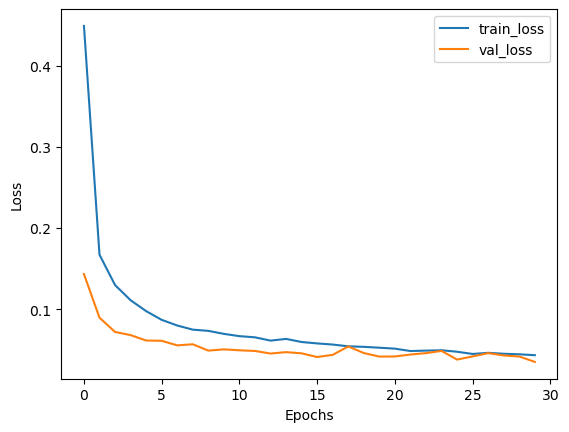

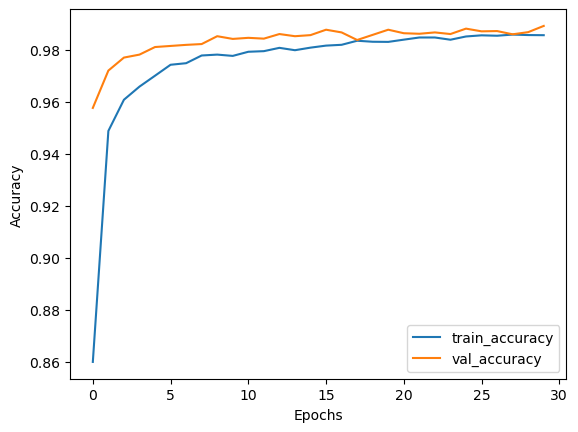

----------------------------------------------------------------------------------------------------
Test set evaluation:  {'loss': 0.041792865842580795, 'accuracy': 0.987500011920929}
----------------------------------------------------------------------------------------------------


In [17]:
# callbacks=[keras.callbacks.EarlyStopping(patience=4, verbose=1), ],

def train_full_model(X_train, X_test, Y_train, Y_test):
    
    X_train, Y_train = shuffle(X_train, Y_train)
    
    model = create_model()
    model.compile( loss="categorical_crossentropy",  optimizer="Adam",  metrics='accuracy' )
    
    early_stopping = keras.callbacks.EarlyStopping(patience=15, verbose=1)

    history = model.fit( X_train, Y_train, batch_size = 64, epochs=30,
                        validation_split=.20,callbacks=[ keras.callbacks.ModelCheckpoint( "FullModelCheckpoint.h5",
                        verbose=1, save_best_only=True ),early_stopping ], )

    plot_history(
        history.history["loss"],
        history.history["val_loss"],
        history.history["accuracy"],
        history.history["val_accuracy"],
    )


    print("-" * 100)
    print(
        "Test set evaluation: ",
        model.evaluate( X_test, Y_test , verbose=0, return_dict=True),
    )
    print("-" * 100)
    return model


full_dataset_model = train_full_model(X_all, X_test, Y_all, Y_test)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 conv2d_18 (Conv2D)          (None, 24, 24, 8)         584       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 12, 12, 8)        0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 10, 10, 16)        1168      
                                                                 
 conv2d_20 (Conv2D)          (None, 8, 8, 16)          2320      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 4, 4, 16)         0         
 g2D)                                                 

150/150 [==============================] - 5s 30ms/step - loss: 0.0628 - accuracy: 0.9801 - val_loss: 0.0827 - val_accuracy: 0.9796
Epoch 22/30
150/150 [==============================] - ETA: 0s - loss: 0.0686 - accuracy: 0.9775
Epoch 22: val_loss did not improve from 0.07002
150/150 [==============================] - 4s 28ms/step - loss: 0.0686 - accuracy: 0.9775 - val_loss: 0.0791 - val_accuracy: 0.9775
Epoch 23/30
150/150 [==============================] - ETA: 0s - loss: 0.0645 - accuracy: 0.9793
Epoch 23: val_loss did not improve from 0.07002
150/150 [==============================] - 5s 30ms/step - loss: 0.0645 - accuracy: 0.9793 - val_loss: 0.0729 - val_accuracy: 0.9796
Epoch 24/30
148/150 [============================>.] - ETA: 0s - loss: 0.0607 - accuracy: 0.9794
Epoch 24: val_loss did not improve from 0.07002
150/150 [==============================] - 5s 32ms/step - loss: 0.0603 - accuracy: 0.9796 - val_loss: 0.0770 - val_accuracy: 0.9800
Epoch 25/30
150/150 [================

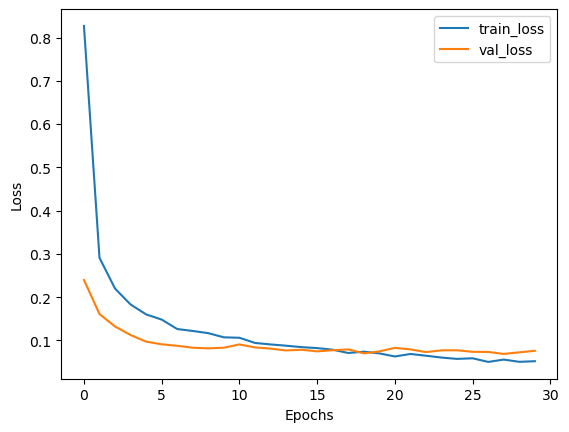

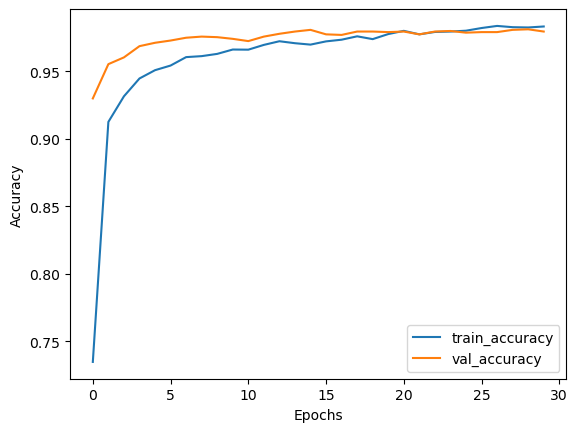

----------------------------------------------------------------------------------------------------
Test set evaluation:  {'loss': 0.0699930489063263, 'accuracy': 0.9792500138282776}
----------------------------------------------------------------------------------------------------


In [18]:
# callbacks=[keras.callbacks.EarlyStopping(patience=4, verbose=1), ],

def train_full_model(X_train, X_test, Y_train, Y_test):
    
    X_train, Y_train = shuffle(X_train, Y_train)
    
    model = create_model()
    model.compile( loss="categorical_crossentropy",  optimizer="Adam",  metrics='accuracy' )
    
    early_stopping = keras.callbacks.EarlyStopping(patience=15, verbose=1)

    history = model.fit( X_train, Y_train, batch_size = 64, epochs=30,
                        validation_split=.20,callbacks=[ keras.callbacks.ModelCheckpoint( "FullModelCheckpoint.h5",
                        verbose=1, save_best_only=True ),early_stopping ], )

    plot_history(
        history.history["loss"],
        history.history["val_loss"],
        history.history["accuracy"],
        history.history["val_accuracy"],
    )


    print("-" * 100)
    print(
        "Test set evaluation: ",
        model.evaluate( X_test, Y_test , verbose=0, return_dict=True),
    )
    print("-" * 100)
    return model


full_dataset_model = train_full_model(X_train, X_test, Y_train, Y_test)

In [23]:
def train(model,X_train, Y_train):
    
    X_train, Y_train = shuffle(X_train, Y_train)

    early_stopping = keras.callbacks.EarlyStopping(patience=15, verbose=1)

    print(f"Starting to train with {len(Y_train)} samples")

    history = model.fit(X_train, Y_train, batch_size = 64, epochs=30,validation_split=.20)
    plot_history(
        history.history["loss"],
        history.history["val_loss"],
        history.history["accuracy"],
        history.history["val_accuracy"],
    )

    return model

In [24]:
def test(model, X_test, Y_test):
    print("-" * 100)
    print("Test set evaluation: ", model.evaluate( X_test, Y_test , verbose=0, return_dict=True), )
    print("-" * 100)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 conv2d_30 (Conv2D)          (None, 24, 24, 8)         584       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 12, 12, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 10, 10, 16)        1168      
                                                                 
 conv2d_32 (Conv2D)          (None, 8, 8, 16)          2320      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 4, 4, 16)         0         
 g2D)                                                 

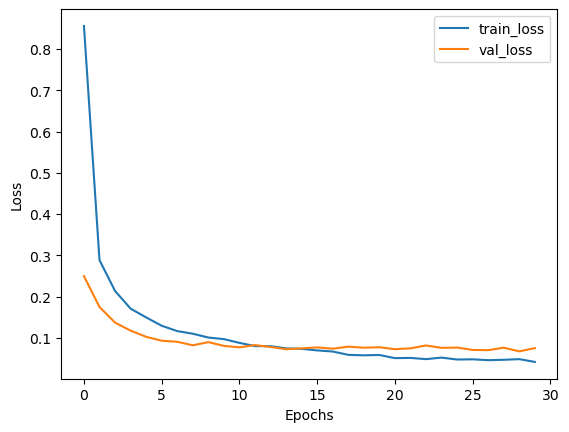

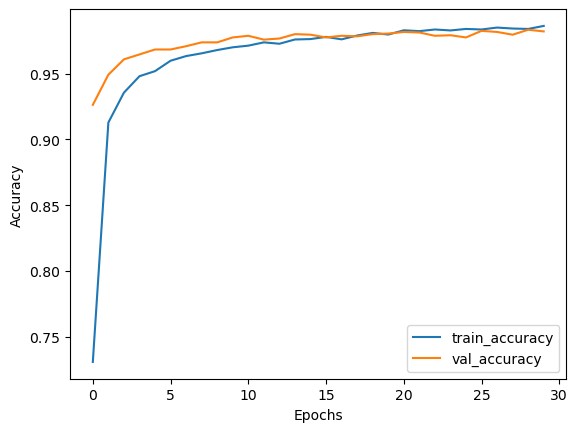




Iteration : 
0



113/113 [==============================] - 1s 5ms/step
----------------------------------------------------------------------------------------------------
Test set evaluation:  {'loss': 0.07835198193788528, 'accuracy': 0.9774166941642761}
----------------------------------------------------------------------------------------------------
Starting to train with 15600 samples
Epoch 1/30
195/195 [==============================] - 5s 24ms/step - loss: 0.0584 - accuracy: 0.9800 - val_loss: 0.0261 - val_accuracy: 0.9917
Epoch 2/30
195/195 [==============================] - 5s 24ms/step - loss: 0.0483 - accuracy: 0.9825 - val_loss: 0.0290 - val_accuracy: 0.9907
Epoch 3/30
195/195 [==============================] - 5s 24ms/step - loss: 0.0508 - accuracy: 0.9823 - val_loss: 0.0272 - val_accuracy: 0.9913
Epoch 4/30
195/195 [==============================] - 5s 24ms/step - loss: 0.0507 - accuracy: 0.9825 - val_loss: 0.0293 - val_accuracy: 0.9907
Epoch 5/30
195/195 [=========

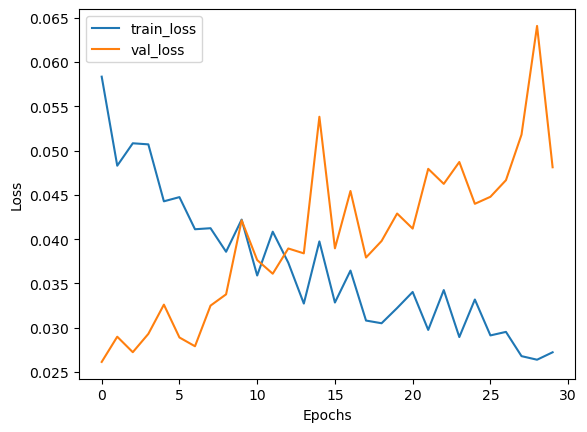

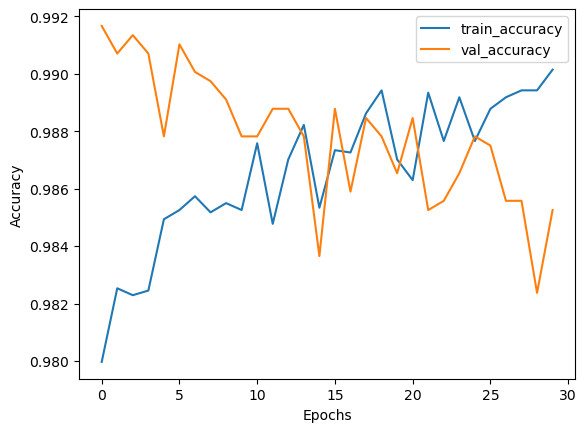




Iteration : 
1



113/113 [==============================] - 1s 8ms/step
----------------------------------------------------------------------------------------------------
Test set evaluation:  {'loss': 0.07409914582967758, 'accuracy': 0.9795833230018616}
----------------------------------------------------------------------------------------------------
Starting to train with 19200 samples
Epoch 1/30
240/240 [==============================] - 7s 30ms/step - loss: 0.0508 - accuracy: 0.9840 - val_loss: 0.0113 - val_accuracy: 0.9956
Epoch 2/30
240/240 [==============================] - 7s 28ms/step - loss: 0.0391 - accuracy: 0.9864 - val_loss: 0.0149 - val_accuracy: 0.9937
Epoch 3/30
240/240 [==============================] - 7s 30ms/step - loss: 0.0365 - accuracy: 0.9874 - val_loss: 0.0186 - val_accuracy: 0.9911
Epoch 4/30
240/240 [==============================] - 8s 33ms/step - loss: 0.0394 - accuracy: 0.9854 - val_loss: 0.0176 - val_accuracy: 0.9922
Epoch 5/30
240/240 [=========

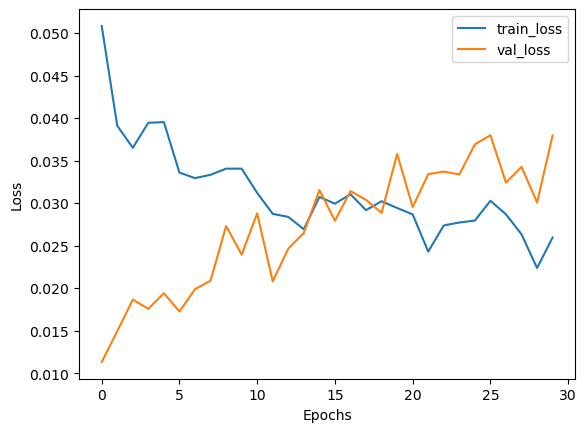

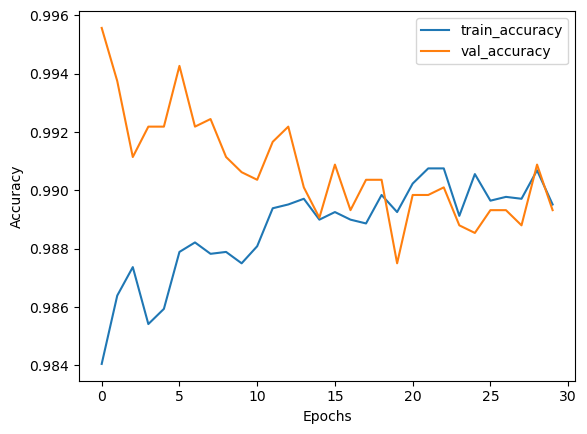




Iteration : 
2



113/113 [==============================] - 1s 7ms/step
----------------------------------------------------------------------------------------------------
Test set evaluation:  {'loss': 0.08135836571455002, 'accuracy': 0.9808333516120911}
----------------------------------------------------------------------------------------------------
Starting to train with 22800 samples
Epoch 1/30
285/285 [==============================] - 9s 32ms/step - loss: 0.0373 - accuracy: 0.9858 - val_loss: 0.0123 - val_accuracy: 0.9954
Epoch 2/30
285/285 [==============================] - 9s 31ms/step - loss: 0.0368 - accuracy: 0.9871 - val_loss: 0.0322 - val_accuracy: 0.9895
Epoch 3/30
285/285 [==============================] - 9s 31ms/step - loss: 0.0360 - accuracy: 0.9877 - val_loss: 0.0163 - val_accuracy: 0.9921
Epoch 4/30
285/285 [==============================] - 9s 32ms/step - loss: 0.0344 - accuracy: 0.9882 - val_loss: 0.0149 - val_accuracy: 0.9939
Epoch 5/30
285/285 [=========

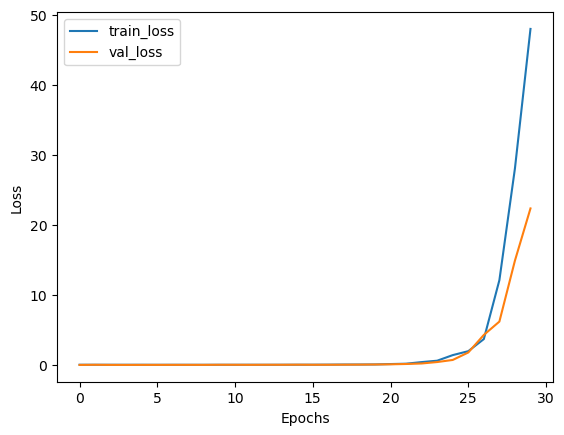

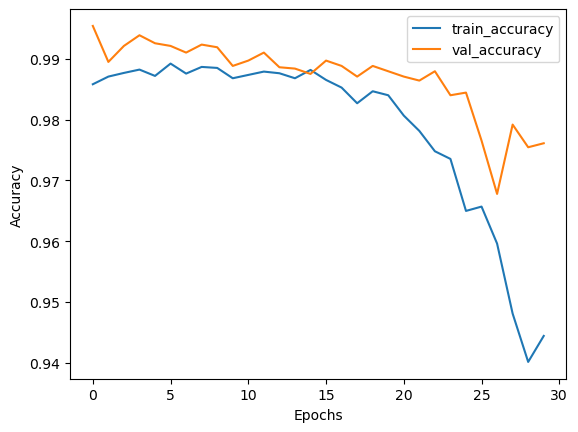




Iteration : 
3



113/113 [==============================] - 1s 7ms/step
----------------------------------------------------------------------------------------------------
Test set evaluation:  {'loss': 28.44672966003418, 'accuracy': 0.9747499823570251}
----------------------------------------------------------------------------------------------------
Starting to train with 26400 samples
Epoch 1/30
330/330 [==============================] - 11s 33ms/step - loss: 60.6064 - accuracy: 0.9464 - val_loss: 17.3373 - val_accuracy: 0.9830
Epoch 2/30
330/330 [==============================] - 11s 33ms/step - loss: 91.6408 - accuracy: 0.9455 - val_loss: 56.2671 - val_accuracy: 0.9703
Epoch 3/30
330/330 [==============================] - 10s 30ms/step - loss: 115.8154 - accuracy: 0.9455 - val_loss: 69.9646 - val_accuracy: 0.9703
Epoch 4/30
330/330 [==============================] - 11s 32ms/step - loss: 165.0490 - accuracy: 0.9430 - val_loss: 58.8852 - val_accuracy: 0.9763
Epoch 5/30
330/33

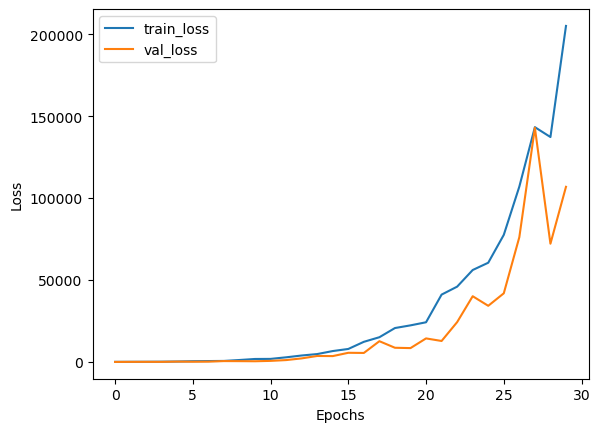

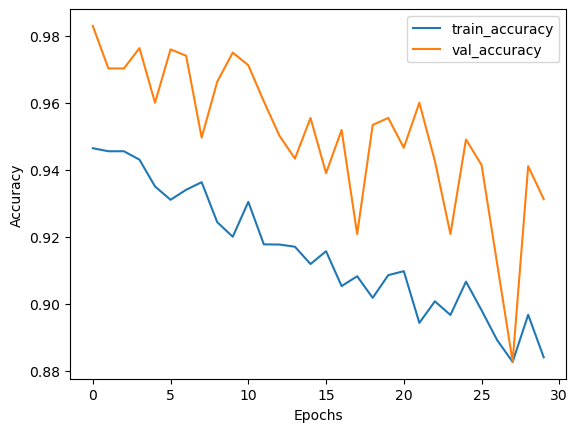




Iteration : 
4



113/113 [==============================] - 1s 8ms/step
----------------------------------------------------------------------------------------------------
Test set evaluation:  {'loss': 130793.3828125, 'accuracy': 0.9208333492279053}
----------------------------------------------------------------------------------------------------
Starting to train with 30000 samples
Epoch 1/30
375/375 [==============================] - 12s 32ms/step - loss: 241350.7812 - accuracy: 0.8813 - val_loss: 133298.8438 - val_accuracy: 0.9175
Epoch 2/30
375/375 [==============================] - 12s 32ms/step - loss: 274687.8438 - accuracy: 0.8858 - val_loss: 150290.0000 - val_accuracy: 0.9353
Epoch 3/30
375/375 [==============================] - 12s 32ms/step - loss: 384085.2812 - accuracy: 0.8728 - val_loss: 251579.2500 - val_accuracy: 0.9147
Epoch 4/30
375/375 [==============================] - 12s 32ms/step - loss: 482250.2500 - accuracy: 0.8738 - val_loss: 202956.3125 - val_accurac

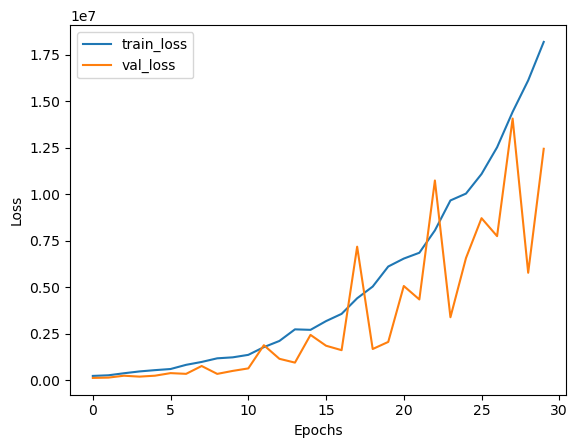

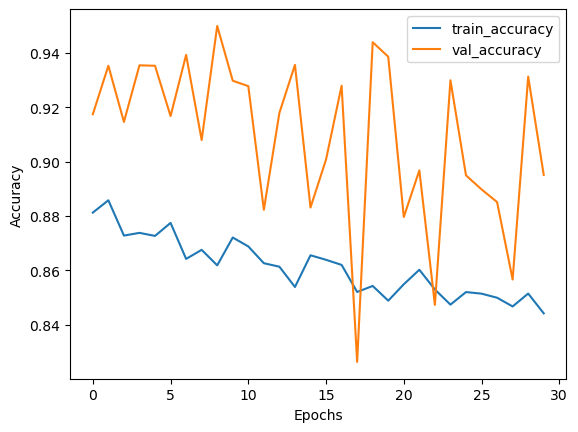




Iteration : 
5



113/113 [==============================] - 1s 7ms/step
----------------------------------------------------------------------------------------------------
Test set evaluation:  {'loss': 11548449.0, 'accuracy': 0.893916666507721}
----------------------------------------------------------------------------------------------------
Starting to train with 33600 samples
Epoch 1/30
420/420 [==============================] - 14s 34ms/step - loss: 21225774.0000 - accuracy: 0.8420 - val_loss: 13526201.0000 - val_accuracy: 0.8879
Epoch 2/30
420/420 [==============================] - 14s 33ms/step - loss: 21339948.0000 - accuracy: 0.8464 - val_loss: 9976512.0000 - val_accuracy: 0.9176
Epoch 3/30
420/420 [==============================] - 14s 33ms/step - loss: 22781260.0000 - accuracy: 0.8471 - val_loss: 19139092.0000 - val_accuracy: 0.8717
Epoch 4/30
420/420 [==============================] - 14s 34ms/step - loss: 26382652.0000 - accuracy: 0.8434 - val_loss: 15512897.0000 - v

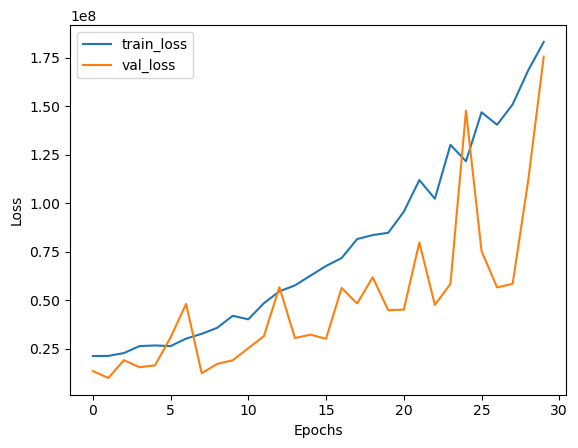

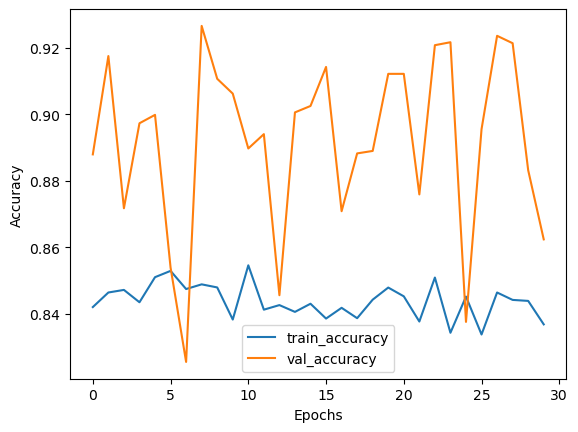




Iteration : 
6



113/113 [==============================] - 0s 4ms/step
----------------------------------------------------------------------------------------------------
Test set evaluation:  {'loss': 186274800.0, 'accuracy': 0.8552500009536743}
----------------------------------------------------------------------------------------------------
Starting to train with 37200 samples
Epoch 1/30
465/465 [==============================] - 12s 26ms/step - loss: 197587152.0000 - accuracy: 0.8349 - val_loss: 211379632.0000 - val_accuracy: 0.8270
Epoch 2/30
465/465 [==============================] - 11s 23ms/step - loss: 234041888.0000 - accuracy: 0.8273 - val_loss: 169155600.0000 - val_accuracy: 0.8601
Epoch 3/30
465/465 [==============================] - 11s 24ms/step - loss: 240777888.0000 - accuracy: 0.8317 - val_loss: 168649264.0000 - val_accuracy: 0.8707
Epoch 4/30
465/465 [==============================] - 12s 25ms/step - loss: 259772928.0000 - accuracy: 0.8288 - val_loss: 9383682

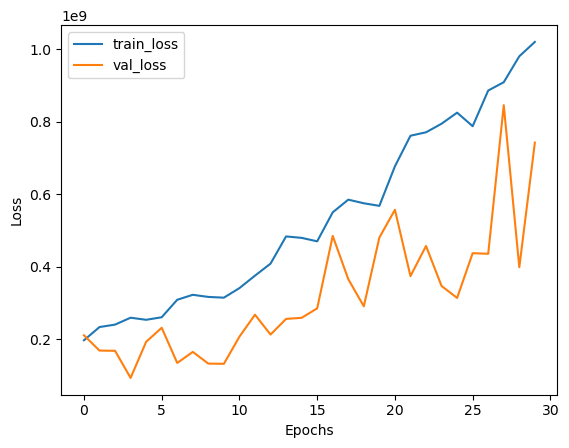

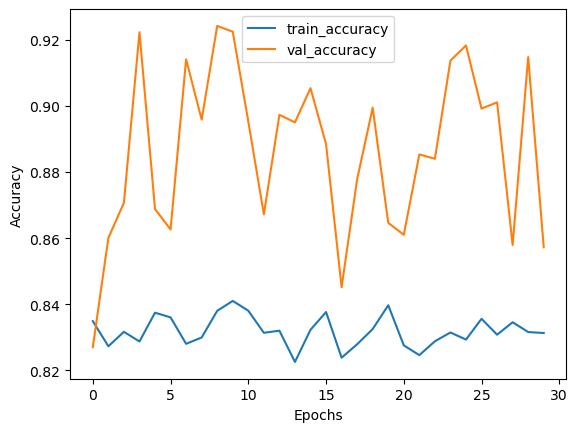




Iteration : 
7



113/113 [==============================] - 1s 5ms/step
----------------------------------------------------------------------------------------------------
Test set evaluation:  {'loss': 871801280.0, 'accuracy': 0.8521666526794434}
----------------------------------------------------------------------------------------------------
Starting to train with 40800 samples
Epoch 1/30
510/510 [==============================] - 10s 20ms/step - loss: 1069968896.0000 - accuracy: 0.8324 - val_loss: 562746560.0000 - val_accuracy: 0.8985
Epoch 2/30
510/510 [==============================] - 12s 24ms/step - loss: 1138491392.0000 - accuracy: 0.8285 - val_loss: 622899904.0000 - val_accuracy: 0.8961
Epoch 3/30
510/510 [==============================] - 13s 25ms/step - loss: 1224793472.0000 - accuracy: 0.8306 - val_loss: 426938880.0000 - val_accuracy: 0.9129
Epoch 4/30
510/510 [==============================] - 13s 25ms/step - loss: 1268943744.0000 - accuracy: 0.8255 - val_loss: 841

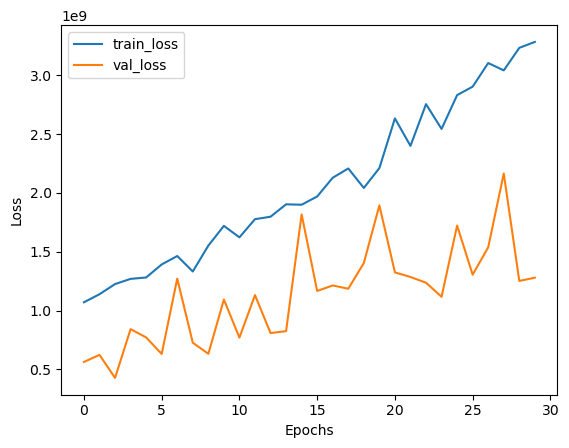

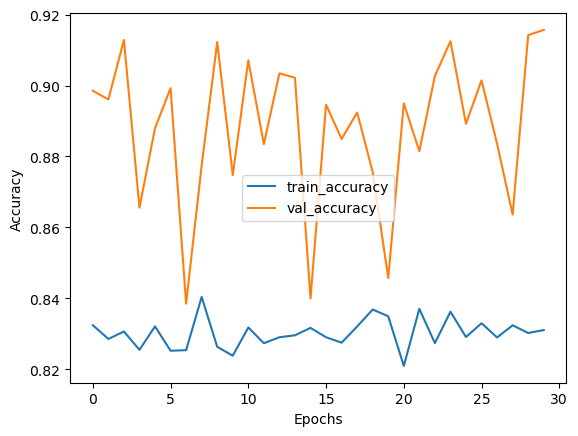




Iteration : 
8



113/113 [==============================] - 1s 5ms/step
----------------------------------------------------------------------------------------------------
Test set evaluation:  {'loss': 1483335552.0, 'accuracy': 0.9160833358764648}
----------------------------------------------------------------------------------------------------
Starting to train with 44400 samples
Epoch 1/30
555/555 [==============================] - 10s 19ms/step - loss: 3151757824.0000 - accuracy: 0.8394 - val_loss: 2435272448.0000 - val_accuracy: 0.8787
Epoch 2/30
555/555 [==============================] - 13s 23ms/step - loss: 3463194368.0000 - accuracy: 0.8334 - val_loss: 1757756032.0000 - val_accuracy: 0.8980
Epoch 3/30
555/555 [==============================] - 13s 24ms/step - loss: 3973636864.0000 - accuracy: 0.8256 - val_loss: 1565116416.0000 - val_accuracy: 0.9110
Epoch 4/30
555/555 [==============================] - 13s 24ms/step - loss: 3797229568.0000 - accuracy: 0.8350 - val_loss:

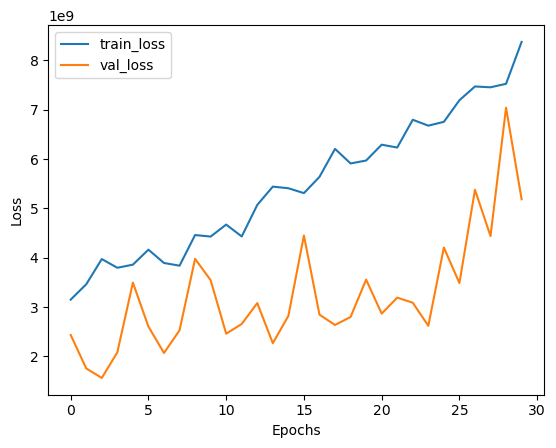

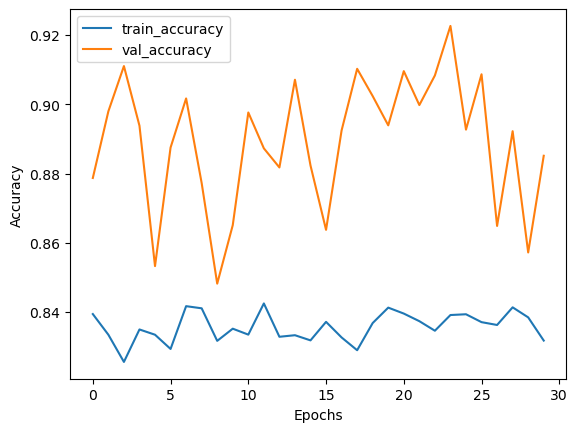

113/113 [==============================] - 1s 5ms/step
Starting to train with 47991 samples
Epoch 1/30
600/600 [==============================] - 14s 23ms/step - loss: 8491117056.0000 - accuracy: 0.8365 - val_loss: 4815163904.0000 - val_accuracy: 0.9007
Epoch 2/30
600/600 [==============================] - 15s 26ms/step - loss: 8876967936.0000 - accuracy: 0.8351 - val_loss: 4366144000.0000 - val_accuracy: 0.9048
Epoch 3/30
600/600 [==============================] - 15s 26ms/step - loss: 9120710656.0000 - accuracy: 0.8360 - val_loss: 5185179136.0000 - val_accuracy: 0.8960
Epoch 4/30
600/600 [==============================] - 16s 26ms/step - loss: 9339094016.0000 - accuracy: 0.8365 - val_loss: 8017915392.0000 - val_accuracy: 0.8448
Epoch 5/30
600/600 [==============================] - 15s 25ms/step - loss: 9298804736.0000 - accuracy: 0.8394 - val_loss: 5909628416.0000 - val_accuracy: 0.8771
Epoch 6/30
600/600 [==============================] - 14s 23ms/step - loss: 9497563136.0000 - accu

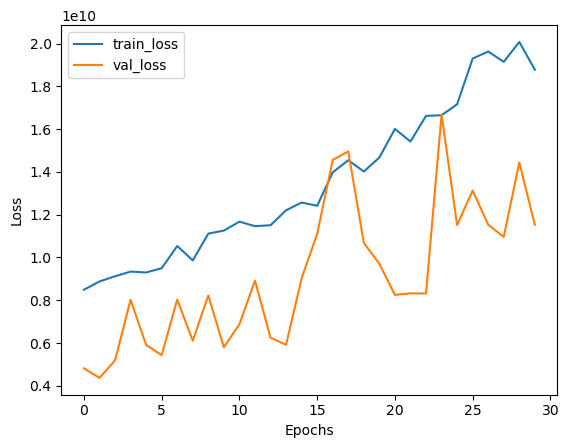

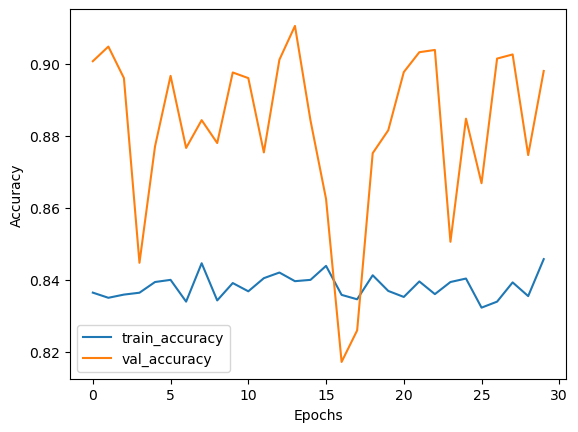

----------------------------------------------------------------------------------------------------
Test set evaluation:  {'loss': 10403173376.0, 'accuracy': 0.9102500081062317}
----------------------------------------------------------------------------------------------------


In [25]:
from sklearn.metrics import confusion_matrix
import random

def train_active_learning_models(
    X_train,
    Y_train,
    x_unlab,
    y_unlab,
    X_test,
    Y_test,
    num_iterations=5
):

    # Creating lists for storing metrics
    losses, val_losses, accuracies, val_accuracies = [], [], [], []

    model = create_model()
    # We will monitor the false positives and false negatives predicted by our model
    # These will decide the subsequent sampling ratio for every Active Learning loop
    model.compile(
        loss="categorical_crossentropy",
        optimizer="Adam",
        metrics='accuracy',
    )
    
    model = train(model,X_train, Y_train)
    
    d = 100/num_iterations
    l = len(y_unlab)
    x = int(np.round( l/d ))
    
    for iteration in range(num_iterations-1):
        
        l = len(y_unlab)
        
        print("\n\n")
        
        print("Iteration : ")
        
        print(iteration)
        
        print("\n\n")
         
        #generate random number and substract from all numbers
        rnd = random.sample(range(1, l), x)
        all = list(range(1, l))
        main_list = list(set(all) - set(rnd))
        
        #add those index to from unlablled set to training set
        new_lab = x_unlab[rnd]
        arr = np.concatenate((X_train, new_lab))
        X_train = arr

        #predict on the set and add to training data
        new_y = np.round(model.predict(new_lab))
        arr = np.concatenate((Y_train, new_y))
        Y_train = arr
        
        
        #create the new unlabelled set
        x_unlab = x_unlab[main_list]

        #create the new unlabelled label set
        y_unlab = y_unlab[main_list]
        
        #test on data
        test(model, X_test, Y_test)
        
        #train on data
        model = train(model,X_train, Y_train)
        
    #Final round training set
    arr = np.concatenate((X_train, x_unlab))
    X_train = arr

    #Final round training label set
    new_y = np.round(model.predict(x_unlab))
    arr = np.concatenate((Y_train, new_y))
    Y_train = arr
    
    #train final
    model = train(model,X_train, Y_train)
    
    #test for final time
    test(model, X_test, Y_test)
        
    #return model
    return model

active_learning_model = train_active_learning_models(X_train,Y_train,x_unlab,y_unlab,X_test,Y_test,num_iterations=10)